

---



---



# Dummy Classifier Notebook


---



---



DummyClassifier is a simple baseline classifier used for comparison with more sophisticated models. It makes predictions using simple rules, such as predicting the most frequent class or generating random predictions. It's useful for understanding classification problem difficulty and evaluating model performance.


In this notebook, we will use the DummyClassifier algorithm as a baseline model on the MNIST dataset.

### **MNIST Dataset:**
The MNIST dataset is a large database of handwritten digits commonly used for training various image processing systems. It contains 70,000 images of handwritten digits from 0 to 9, making it a staple dataset for benchmarking classification algorithms.

![MNIST Sample](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


#Setup

In [ ]:

# imports
import numpy as np
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Establish a fixed random seed for consistent reproducibility in random processes
np.random.seed(42)


#Import MNIST dataset

In [ ]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Print the keys of the dataset
print(mnist.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:

X, y = mnist["data"], mnist["target"]

# Print the shape of the feature matrix (X)
print(X.shape)

(70000, 784)


In [ ]:
# Print the shape of the target labels (y)
print(y.shape)

(70000,)


In [ ]:
# Calculate the product of 28 * 28
print(28 * 28)

784


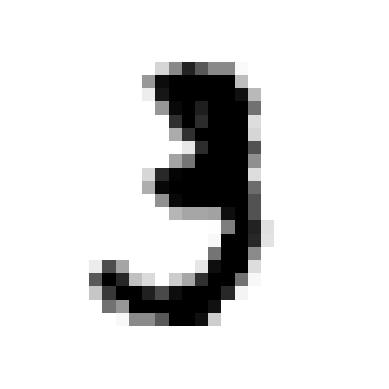

In [ ]:
# Select a digit from the MNIST dataset
some_digit = X[10]

# Reshape the flattened 1D array into a 2D array representing a 28x28 image
some_digit_image = some_digit.reshape(28, 28)

# Display the digit using Matplotlib with a binary color map (black and white)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

# Turn off axis labels
plt.axis("off")

# Save the figure with the name "some_digit_plot.png"
plt.savefig("some_digit_plot.png")

# Show the plotted image
plt.show()

In [ ]:
# Display the label of the first digit in the MNIST dataset
print("Label of the first digit:", y[10])


Label of the first digit: 3


In [ ]:

# Convert the entire y array to unsigned integers
y = y.astype(np.uint8)

In [ ]:
# Define a function to plot a digit
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [ ]:
# Define a function to plot a grid of digits
def plot_digits(instances, images_per_row=10, **options):
    # Size of each image (assuming 28x28 pixels for MNIST)
    size = 28

    # Calculate the number of rows needed for the grid
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Calculate the number of empty slots needed to fill the grid
    n_empty = n_rows * images_per_row - len(instances)

    # Pad the instances array with zeros to fill the empty slots
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array to create a grid of images
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). Use transpose() and reshape for this.
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)

    # Display the big image grid
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")


#### **Split the data into training and testing**

This is done to train the model and then later evaluate the model's learning ability on the training dataset and its generalization ability on the test dataset

In [ ]:
# Split the MNIST dataset into training and testing sets
# X_train: Training feature matrix (first 60,000 samples)
# X_test: Testing feature matrix (remaining samples)
# y_train: Training target labels (first 60,000 samples)
# y_test: Testing target labels (remaining samples)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Map the target column to a binary label (5 or not) with True and False to transform the problem to a binary classification problem

In [ ]:
# Create binary labels for the "5" digit in the training set
# y_train_5: True for instances where the label is 5, False otherwise
y_train_5 = (y_train == 5)

# Create binary labels for the "5" digit in the testing set
# y_test_5: True for instances where the label is 5, False otherwise
y_test_5 = (y_test == 5)

#### **Predict using the Dummy Classifier**

The `DummyClassifier` is a classifier that makes predictions using simple rules, which makes it useful for establishing baseline performance metrics for classification tasks. It comes with a `strategy` attribute that determines the approach to make predictions, such as predicting the most frequent class, a random class, or a constant value.

For more details, visit the [DummyClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).


In [ ]:
# Importing the DummyClassifier class from scikit-learn's dummy module
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict

# Creating a DummyClassifier instance with the strategy set to "prior"
dmy_clf = DummyClassifier(strategy="prior")

# Performing cross-validated predictions using the DummyClassifier and obtaining class probabilities
# The predictions are made on the training data X_train and the target variable y_train_5
# The method used to generate class probabilities is "predict_proba"
# The cross-validation strategy used is 3-fold cross-validation (cv=3)
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")

# Extracting the probability scores for the positive class (class labeled as 1)
# These scores will be used for further analysis or evaluation
y_scores_dmy = y_probas_dmy[:, 1]


#### **Evaluate the model**

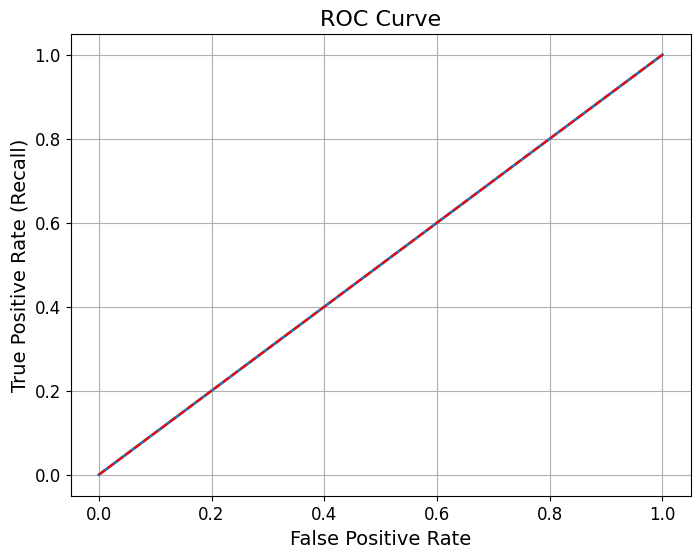

In [ ]:
from sklearn.metrics import roc_curve
#Compute the Receiver Operating Characteristic (ROC) curve using the true labels (y_train_5)
# and the predicted probability scores for the positive class (y_scores_dmy)
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)

# Plot the ROC curve using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fprr, tprr, linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference (random classifier)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Recall)', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.grid(True)
plt.show()

